In [91]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.optimizers.legacy import Adam
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.stattools import acf, pacf
from sklearn import preprocessing, model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Librerias para implementar redes neuronales
import random
import sklearn
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.callbacks import EarlyStopping
register_matplotlib_converters()

In [3]:
def get_stationarity(timeseries, key):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Media Móvil')
    std = plt.plot(rolling_std, color='black', label='Desviación Estándar Móvil')
    plt.legend(loc='best')
    plt.title('Media Móvil y Desviación Estándar Móvil')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries[key])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

# Serie - precio gasolina regular

In [4]:
superior_df = pd.read_csv('data/precios_gasolina.csv', parse_dates = ['fecha'], index_col = ['fecha'])
superior_df = superior_df.drop(['tipo_cambio', 'regular', 'diesel', 'bunker', 'cilindro'], axis = 1)

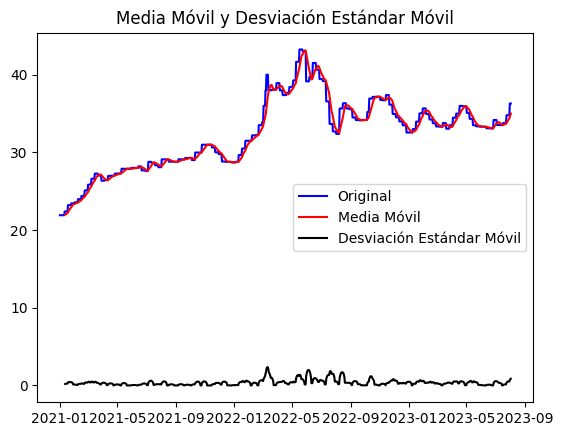

ADF Statistic: -2.3509068062380405
p-value: 0.15607446419325094
Critical Values:
	1%: -3.43735568849112
	5%: -2.864632808981867
	10%: -2.5684167960132225


In [5]:
get_stationarity(superior_df, 'superior')

El valor p es mayor a 0.05, por lo tanto la serie no es estacionaria.

# Serie - Precio Gasolina regular

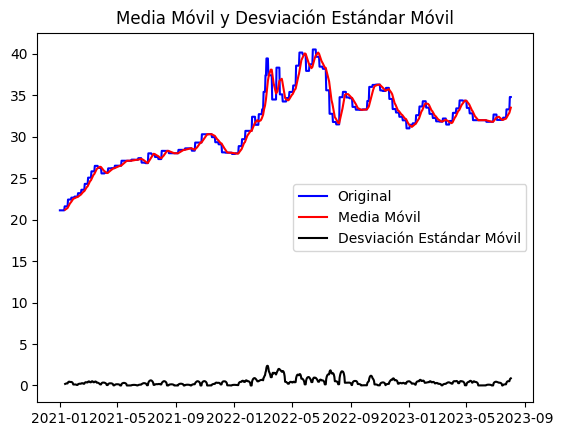

ADF Statistic: -2.211414480259752
p-value: 0.20212877347831437
Critical Values:
	1%: -3.437439232284603
	5%: -2.8646696476686477
	10%: -2.5684364181154127


In [6]:
regular_df = pd.read_csv('data/precios_gasolina.csv', parse_dates = ['fecha'], index_col = ['fecha'])
regular_df = regular_df.drop(['tipo_cambio', 'superior', 'diesel', 'bunker', 'cilindro'], axis = 1)
get_stationarity(regular_df, 'regular')


El valor p es mayor a 0.05, por lo tanto la serie no es estacionaria.

# Serie - Precio Diesel

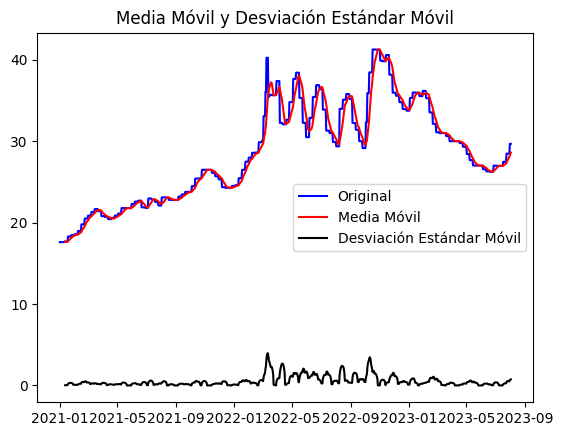

ADF Statistic: -1.9661370829289309
p-value: 0.30161526337236877
Critical Values:
	1%: -3.437462363899248
	5%: -2.8646798473884134
	10%: -2.568441851017076


In [7]:
diesel_df = pd.read_csv('data/precios_gasolina.csv', parse_dates = ['fecha'], index_col = ['fecha'])
diesel_df = diesel_df.drop(['tipo_cambio', 'superior', 'regular', 'bunker', 'cilindro'], axis = 1)
get_stationarity(diesel_df, 'diesel')

El valor p es mayor a 0.05, por lo tanto la serie no es estacionaria.

# Serie - Precio Bunker

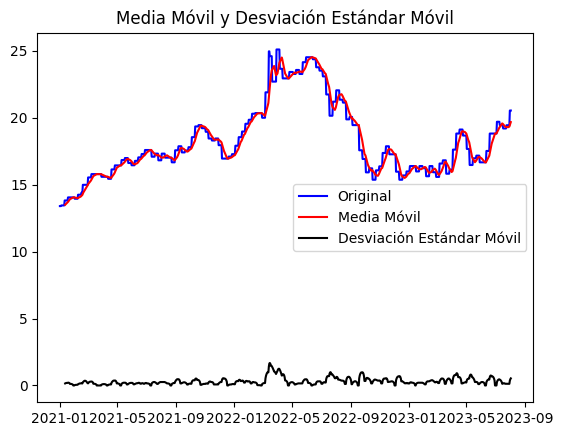

ADF Statistic: -1.9906397669502116
p-value: 0.2906922561302913
Critical Values:
	1%: -3.437423894618058
	5%: -2.864662884591462
	10%: -2.5684328157550835


In [8]:
bunker_df = pd.read_csv('data/precios_gasolina.csv', parse_dates = ['fecha'], index_col = ['fecha'])
bunker_df = bunker_df.drop(['tipo_cambio', 'superior', 'regular', 'diesel', 'cilindro'], axis = 1)
get_stationarity(bunker_df, 'bunker')

El valor p es mayor a 0.05, por lo tanto la serie no es estacionaria.

# Serie - Precio cilindro de gas

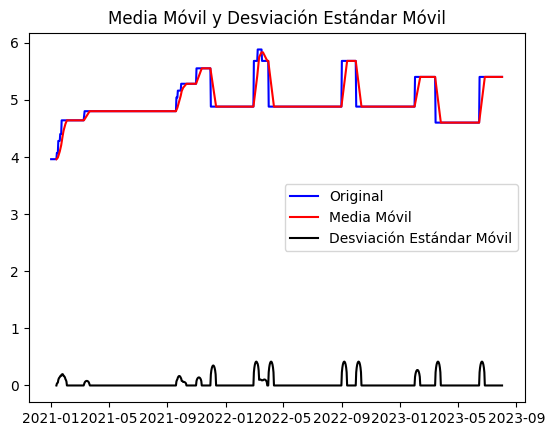

ADF Statistic: -3.8371785733492363
p-value: 0.0025490315503667793
Critical Values:
	1%: -3.437303541847512
	5%: -2.864609814371715
	10%: -2.5684045480287296


In [9]:
cilindro_df = pd.read_csv('data/precios_gasolina.csv', parse_dates = ['fecha'], index_col = ['fecha'])
cilindro_df = cilindro_df.drop(['tipo_cambio', 'superior', 'regular', 'diesel', 'bunker'], axis = 1)
get_stationarity(cilindro_df, 'cilindro')

# Modelos utilizando las series

## Modelo para precios de gasolina superior
- Inicio: 2021-01-01
- Fin: 2023-08-02
- Frecuencia: Diaria

### Descomponiendo el modelo
En los siguientes gráficos se demuestra cierta tendencia en el aumento de precios, por lo que deberemos de realizar transofrmaciones en la serie.

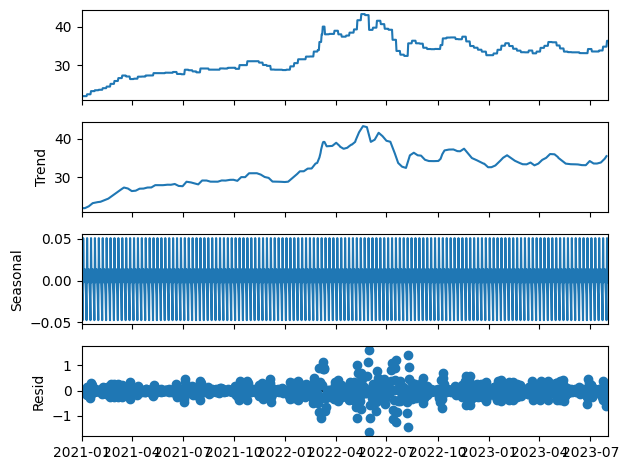

<Figure size 2000x600 with 0 Axes>

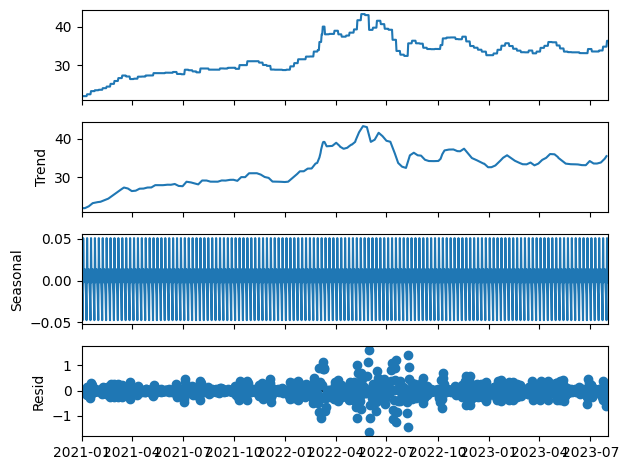

In [10]:

descomposicion = seasonal_decompose(superior_df)
plt.figure(figsize=(20,6))
descomposicion.plot()

### Estimando parametros

Estacionar la varianza

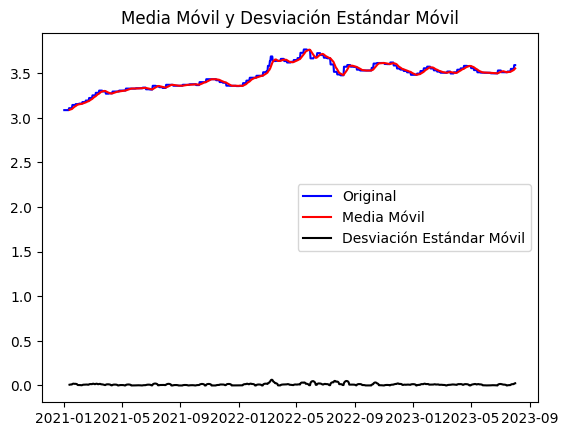

ADF Statistic: -2.583956903636447
p-value: 0.09635858974064004
Critical Values:
	1%: -3.43735568849112
	5%: -2.864632808981867
	10%: -2.5684167960132225


In [11]:
superior_df_log = np.log(superior_df)
get_stationarity(superior_df_log, 'superior')

Estacionar la media

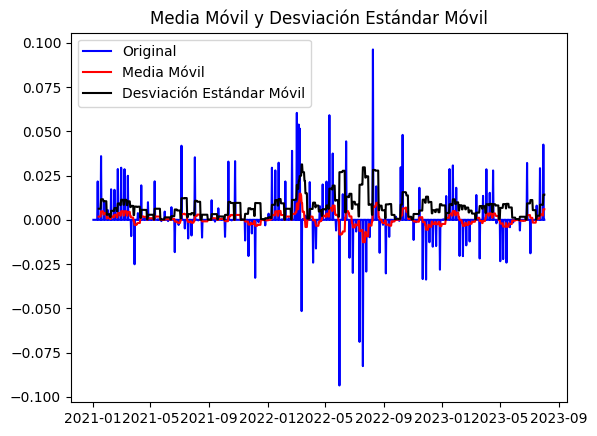

ADF Statistic: -8.415488949530962
p-value: 2.0491479133604347e-13
Critical Values:
	1%: -3.43735568849112
	5%: -2.864632808981867
	10%: -2.5684167960132225


In [21]:
superior_df_diff = superior_df_log.diff()
superior_df_diff.dropna(inplace=True)
get_stationarity(superior_df_diff, 'superior')

Obteniendo valores (p, d, q):
- p: PACF = 7
- d: 1
- q: ACF = 0


Text(0.5, 1.0, 'Función de Autocorrelación')

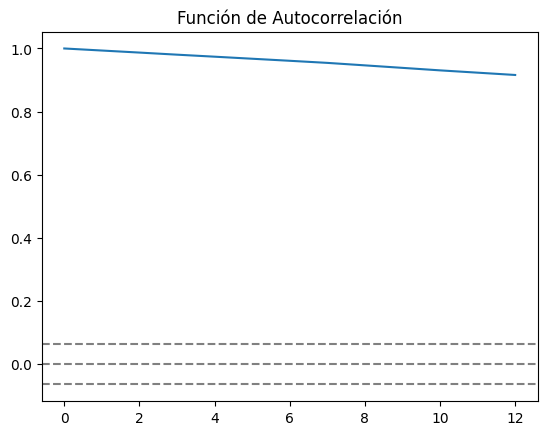

In [23]:
# Valor para p
superior_df_log_diff = superior_df_log.diff()
superior_df_log_diff.dropna(inplace = True)
tsa_acf = acf(superior_df_log,nlags=12,fft=False)
tsa_pacf = pacf(superior_df_log, nlags=36)


plt.plot(tsa_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(superior_df_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(superior_df_log)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación')

Text(0.5, 1.0, 'Función de Autocorrelación Parcial')

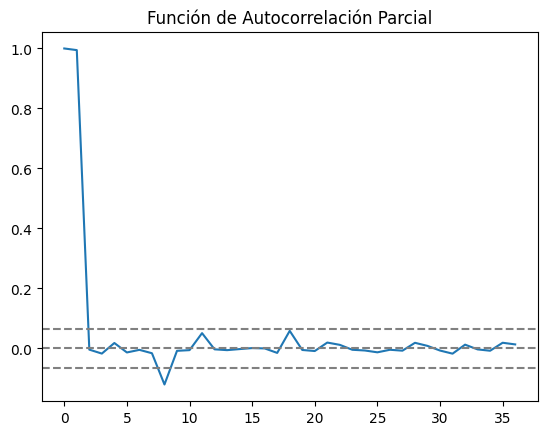

In [24]:
plt.plot(tsa_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(superior_df_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(superior_df_log)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial')

/Users/guillermosantosbarrios/Developer/Universidad/2023/Data Science/Lab2_DataScience/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/guillermosantosbarrios/Developer/Universidad/2023/Data Science/Lab2_DataScience/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.89773D+00    |proj g|=  2.18645D+01

At iterate    5    f= -2.92680D+00    |proj g|=  9.44602D-02

At iterate   10    f= -2.92697D+00    |proj g|=  1.99851D+00

At iterate   15    f= -2.93139D+00    |proj g|=  2.69918D+00

At iterate   20    f= -2.93177D+00    |proj g|=  6.05596D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     24     38      1     0     0   5.493D-03  -2.932D+00
  F =  -2.9319157891350871     

CONVERG

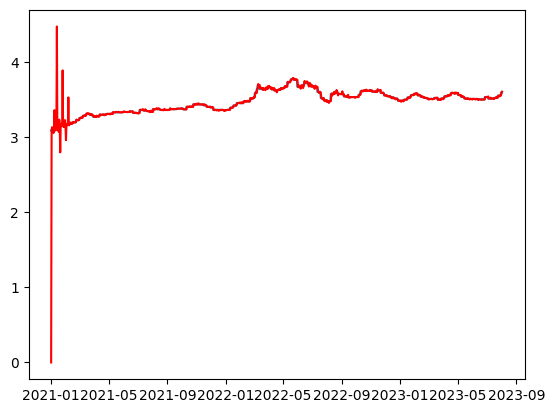

In [42]:
# SARIMAX
# model = ARIMA(superior_df_log, order=(7,1,0), freq='D')
model = SARIMAX(superior_df_log, order=(7,1,0), seasonal_order=(2,1,0,12), enforce_stationarity=False, enforce_invertibility=False)

results = model.fit()
plt.plot(superior_df_log)
plt.plot(results.fittedvalues, color='red')

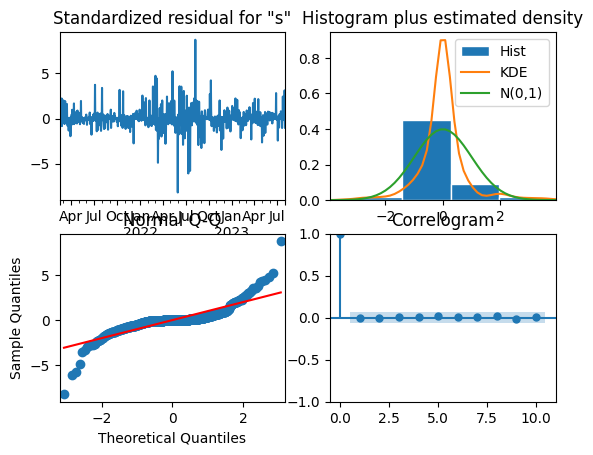

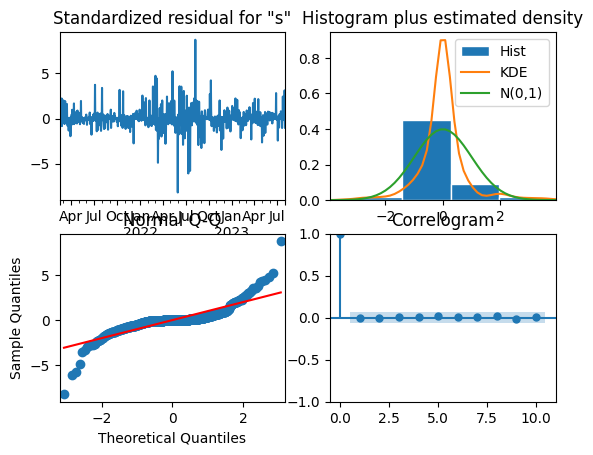

In [43]:
results.plot_diagnostics()

Los residuos no muestran una distribución normal, por lo que el modelo no será bueno generalizando la información.

/Users/guillermosantosbarrios/Developer/Universidad/2023/Data Science/Lab2_DataScience/venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['plot_insample']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


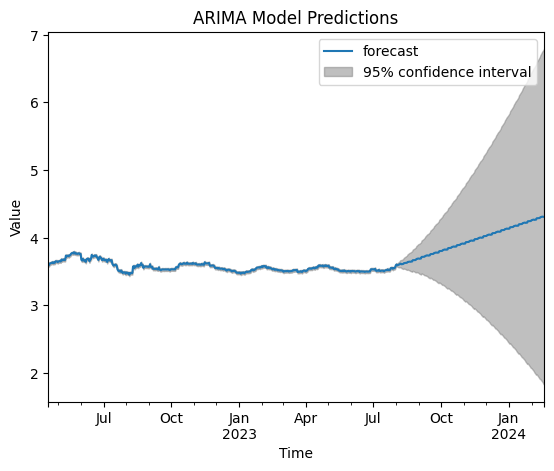

In [44]:
plot_predict(results, start=len(superior_df_log_diff)//2, end=len(superior_df_log_diff) + 200, plot_insample=True)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Model Predictions')
plt.legend()
plt.show()


### Utilizando una red neuronal

In [52]:

superior_df = pd.read_csv('data/precios_gasolina.csv', parse_dates = ['fecha'], index_col = ['fecha'])
superior_df = superior_df.drop(['tipo_cambio', 'regular', 'diesel', 'bunker', 'cilindro'], axis = 1)

# Add three columns year, month and day
superior_df['year'] = superior_df.index.year
superior_df['month'] = superior_df.index.month
superior_df['day'] = superior_df.index.day
superior_df.head()

,superior,year,month,day
fecha,,,,
2021-01-01,21.91,2021,1,1
2021-01-02,21.91,2021,1,2
2021-01-03,21.91,2021,1,3
2021-01-04,21.91,2021,1,4
2021-01-05,21.91,2021,1,5


In [151]:
X = superior_df[['year', 'month', 'day']]
y = superior_df[['superior']]
scaler = StandardScaler()
y = scaler.fit_transform(y.values.reshape(-1, 1))
X = np.asarray(X)
y = np.asarray(y)
# Split the last 10% as validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
y_test = scaler.inverse_transform(y_test)
seed_value = 2302
tf.random.set_seed(seed_value)
np.random.seed(seed_value)
random.seed(seed_value)
sklearn.utils.check_random_state(seed_value)

RandomState(MT19937) at 0x2FAD0AB40

In [156]:
model = Sequential([
    Dense(units=128, input_shape=(3,), activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(300, activation='relu'),
    Dense(1) 
])
model.compile(
    optimizer=Adam(learning_rate=0.0000005), loss='mean_squared_error', 
    metrics=['mean_squared_error']
)
batched_history = model.fit(
    X_train, 
    y_train, 
    epochs=500, 
    validation_split=0.15, 
    batch_size=20, 
    verbose=1,
    callbacks=[]
)

Epoch 1/500


29/29 [==============================] - 0s 4ms/step - loss: 1949.3717 - mean_squared_error: 1949.3717 - val_loss: 1716.9231 - val_mean_squared_error: 1716.9231
Epoch 2/500
29/29 [==============================] - 0s 2ms/step - loss: 1649.3577 - mean_squared_error: 1649.3577 - val_loss: 1441.9764 - val_mean_squared_error: 1441.9764
Epoch 3/500
29/29 [==============================] - 0s 2ms/step - loss: 1387.9222 - mean_squared_error: 1387.9222 - val_loss: 1204.7069 - val_mean_squared_error: 1204.7069
Epoch 4/500
29/29 [==============================] - 0s 2ms/step - loss: 1160.5009 - mean_squared_error: 1160.5009 - val_loss: 998.6702 - val_mean_squared_error: 998.6702
Epoch 5/500
29/29 [==============================] - 0s 3ms/step - loss: 963.3908 - mean_squared_error: 963.3908 - val_loss: 821.4160 - val_mean_squared_error: 821.4160
Epoch 6/500
29/29 [==============================] - 0s 2ms/step - loss: 794.8556 - mean_squared_error: 794.8556 - val_loss: 670.3485 - val_mean_squared_

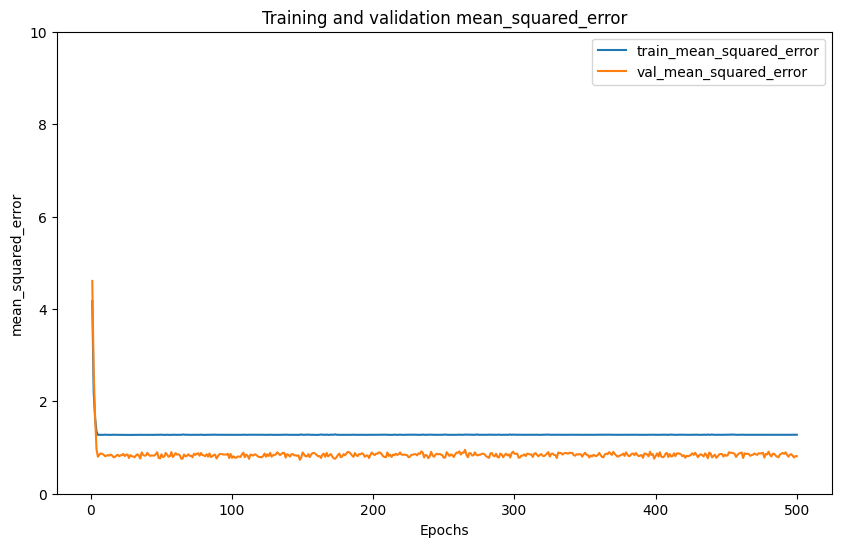

In [146]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
def plot_metric(history, metric):
		plt.figure(figsize=(10, 6))
		train_metrics = history.history[metric]
		val_metrics = history.history['val_'+metric]
		epochs = range(1, len(train_metrics) + 1)
		plt.plot(epochs, train_metrics)
		plt.plot(epochs, val_metrics)
		plt.title('Training and validation '+ metric)
		plt.xlabel("Epochs")
		plt.ylabel(metric)
		plt.legend(["train_"+metric, 'val_'+metric])
		plt.ylim([0,10])
		plt.show()
	
plot_metric(batched_history, 'mean_squared_error')

[[2022   10   23]
 [2022   10   24]
 [2022   10   25]
 [2022   10   26]
 [2022   10   27]
 [2022   10   28]
 [2022   10   29]
 [2022   10   30]
 [2022   10   31]
 [2022   11    1]
 [2022   11    2]
 [2022   11    3]
 [2022   11    4]
 [2022   11    5]
 [2022   11    6]
 [2022   11    7]
 [2022   11    8]
 [2022   11    9]
 [2022   11   10]
 [2022   11   11]
 [2022   11   12]
 [2022   11   13]
 [2022   11   14]
 [2022   11   15]
 [2022   11   16]
 [2022   11   17]
 [2022   11   18]
 [2022   11   19]
 [2022   11   20]
 [2022   11   21]
 [2022   11   22]
 [2022   11   23]
 [2022   11   24]
 [2022   11   25]
 [2022   11   26]
 [2022   11   27]
 [2022   11   28]
 [2022   11   29]
 [2022   11   30]
 [2022   12    1]
 [2022   12    2]
 [2022   12    3]
 [2022   12    4]
 [2022   12    5]
 [2022   12    6]
 [2022   12    7]
 [2022   12    8]
 [2022   12    9]
 [2022   12   10]
 [2022   12   11]
 [2022   12   12]
 [2022   12   13]
 [2022   12   14]
 [2022   12   15]
 [2022   12   16]
 [2022   1

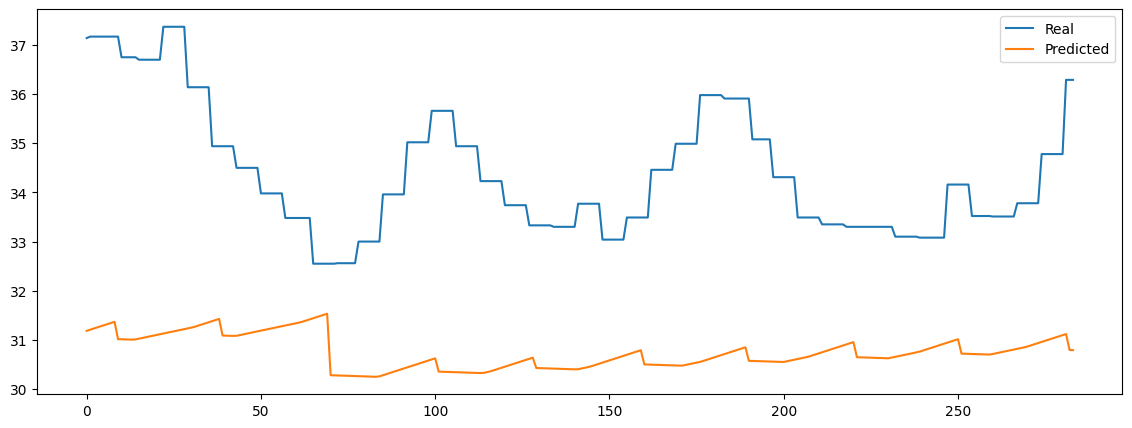

In [157]:
# Predict values
print(X_test)
y_pred = model.predict(X_test)
# Scale back the data to the original representation
y_pred = scaler.inverse_transform(y_pred)

# Plot
plt.figure(figsize=(14,5))
plt.plot(y_test, label='Real')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()



La red neuronal no logró generalizar los resultados correctamente.

https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7